
# Project: Investigate a Dataset - [Medical Appointment No Show]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ScheduledDay tells us on what day the patient set up their appointment.

● Neighborhood indicates the location of the hospital.

● Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if 
  they did not show up.
  
### Dataset Discription 

A csv file contian the data we will analyze.

### Question(s) for Analysis

I will answer the following questions:

Q1.Does age effect attendence?

Q2.does age and chronic diseases affect the attendence?

Q3.Are SMS notifications associated with lowered incidences of No Shows?

Q4.does neighbourhood affect the attendance?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size']=14


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [3]:
#exploring the shape of the data
df.shape

(110527, 14)

data contian 110527 raw and 14 column

In [4]:
# columns data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# check for duplicated rows
df.duplicated().sum()

0

In [6]:
# check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There aren't any missing values or duplicated data in any column.

In [7]:
# check for unique values
df['PatientId'].nunique()

62299

62,299 Patient ids so this means that some patients had more than one appointment

In [8]:
#check the number of duplicated ids. 
df['PatientId'].duplicated().sum()

48228

48228 dulicated ids. 

In [9]:
#check duplicated status of showing or not of the same ids.
df.duplicated(['No-show','PatientId']).sum()

38710

there are 38710 patient have the same status of show or no-show we will remove them in DataCleaning process

In [10]:
# check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

no missing values.

In [11]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

mean age is: 37 , max age is: 115 , min age is:-1 (data entry error) , 50% 0f ages are between 18 and 55 years old.


most patient are not handicapped

In [12]:
#identifying the row index with -1 age value.
m=df.query('Age=="-1"')
m

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

so row number 99832 has a problem so we will remove it 


### Data Cleaning


In [13]:
# removing the -1 age row
df.drop(index=99832 , inplace=True)

correction of names

In [14]:
df.rename(columns={'No-show' : 'No_show'},inplace=True)
df.rename(columns={'Handcap' : 'Handicap'},inplace=True)
df.rename(columns={'Hipertension' : 'Hypertension'},inplace=True)
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMS_received No_show  
0         0           0         0             0      No  
1         0           0         0             0      No  
2         0           0         0             0      No  
3         0           0         0             0      No  
4         1           0         0             0      No

Drop columns

In [15]:
df.drop(['PatientId', 'AppointmentID', 'AppointmentDay', 'ScheduledDay'], axis=1, inplace=True)
df.head()

Gender  Age      Neighbourhood  Scholarship  Hypertension  Diabetes  \
0      F   62    JARDIM DA PENHA            0             1         0   
1      M   56    JARDIM DA PENHA            0             0         0   
2      F   62      MATA DA PRAIA            0             0         0   
3      F    8  PONTAL DE CAMBURI            0             0         0   
4      F   56    JARDIM DA PENHA            0             1         1   

   Alcoholism  Handicap  SMS_received No_show  
0           0         0             0      No  
1           0         0             0      No  
2           0         0             0      No  
3           0         0             0      No  
4           0         0             0      No

Differentiating between people with Handicap and not

In [16]:
# if the value is greater than 1 change it to 1, otherwise keep it
df['Handicap'] = np.where(df['Handicap'] > 1, 1, df['Handicap'])
# confirm
df.Handicap.value_counts()

0    108285
1      2241
Name: Handicap, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



general look 

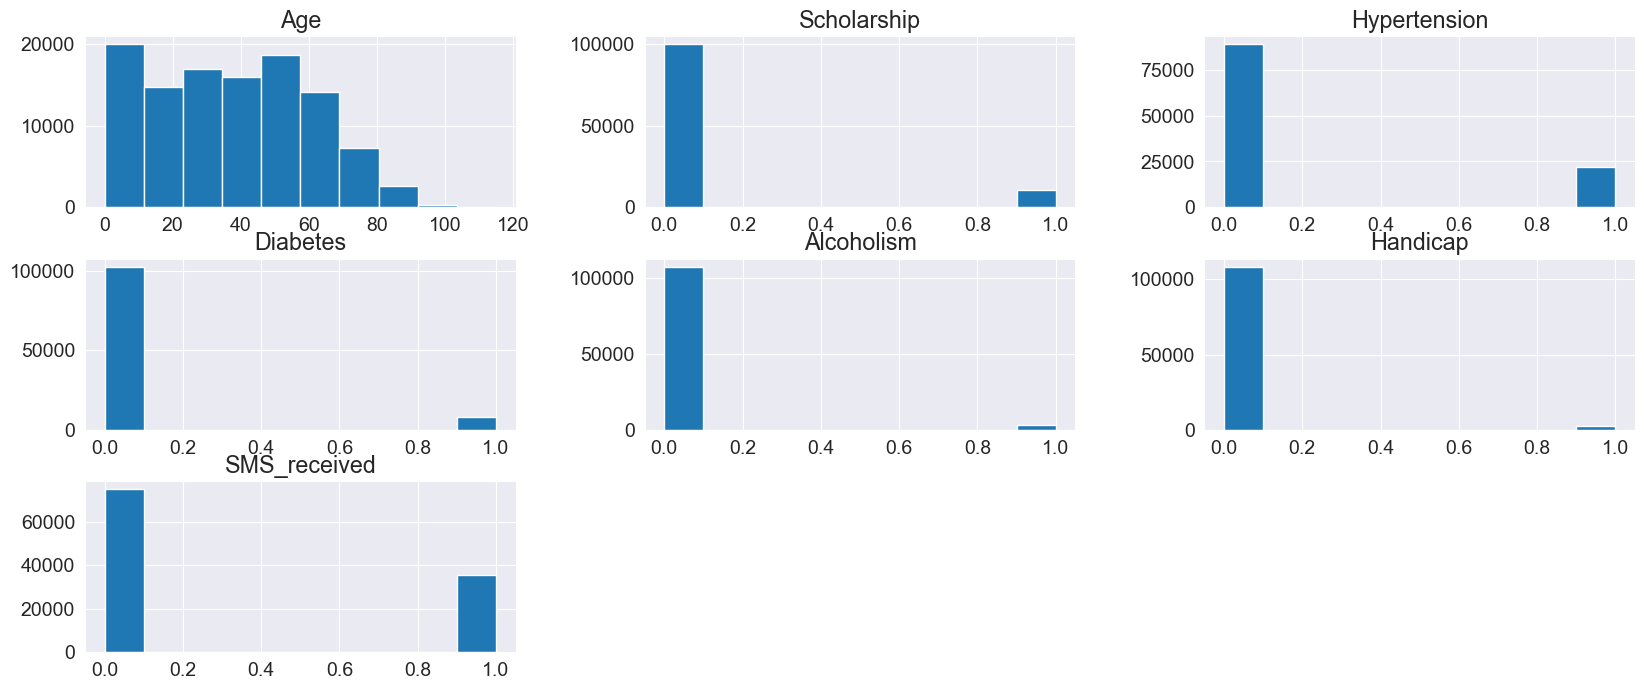

In [17]:
df.hist(figsize=(20,8));

Deep Look on show status

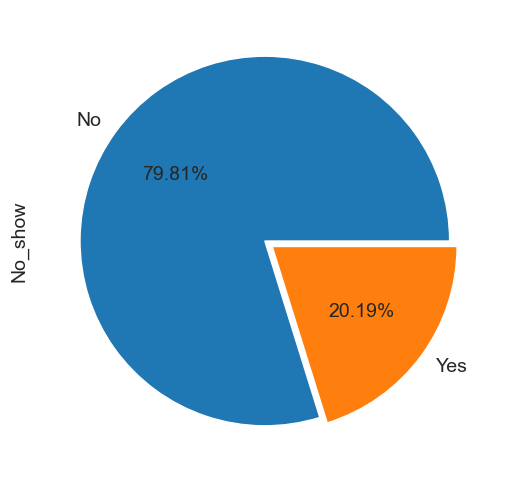

In [18]:
df['BinNoShow'] = (df.No_show == "Yes").astype(int)
df.No_show.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

#### over 20% of all appointments resulted in no shows.

In [19]:
def label(x,y,t,z):
    plt.title(x)
    plt.xticks(y)
    plt.xlabel(t)
    plt.ylabel(z)
    plt.show()

Deep Look on Paitents Gender

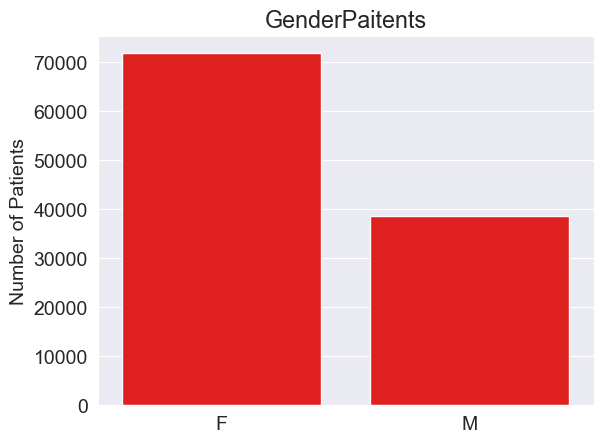

In [20]:
sns.countplot(data = df, x = 'Gender', color = "red")
label('GenderPaitents',[0,1], '','Number of Patients')

Deep Look on Paitents Scholarship Status

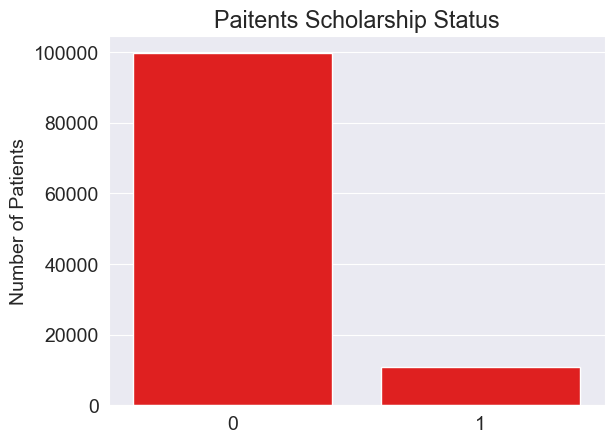

In [21]:
sns.countplot(data = df, x ='Scholarship', color = "red")
label('Paitents Scholarship Status',[0,1], '','Number of Patients')

most of them have no scholarship

Deep Look on Paitents Alcoholism Status

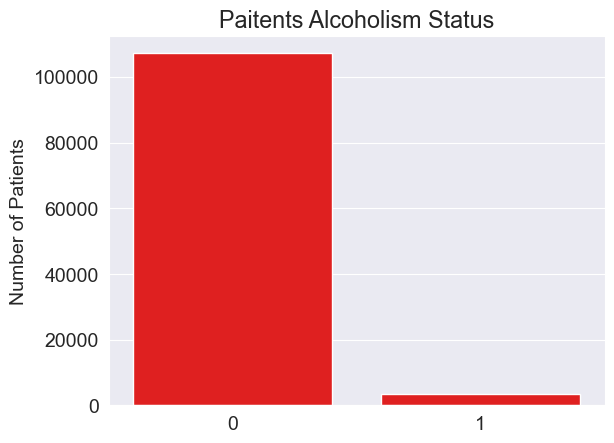

In [22]:
sns.countplot(data = df, x ='Alcoholism', color = "red")
label('Paitents Alcoholism Status',[0,1], '','Number of Patients')

Most of them don't drink alcohol

Deep Look on Paitents Hypertension Status

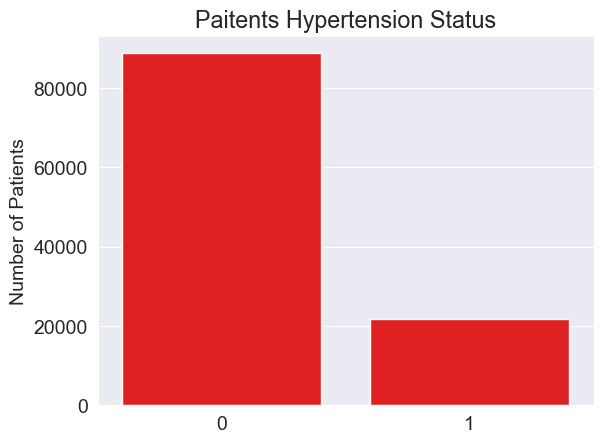

In [23]:
sns.countplot(data = df, x ='Hypertension', color = "red")
label('Paitents Hypertension Status',[0,1], '','Number of Patients')

A quarter of them do not suffer from Hypertension

Deep Look on Paitents Diabetes Status

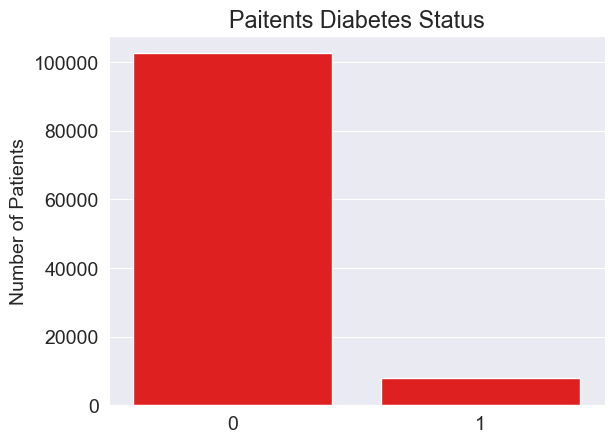

In [24]:
sns.countplot(data = df, x ='Diabetes', color = "red")
label('Paitents Diabetes Status',[0,1], '','Number of Patients')

Most of them don't have Diabetes

Deep Look on Paitents Handcap Status

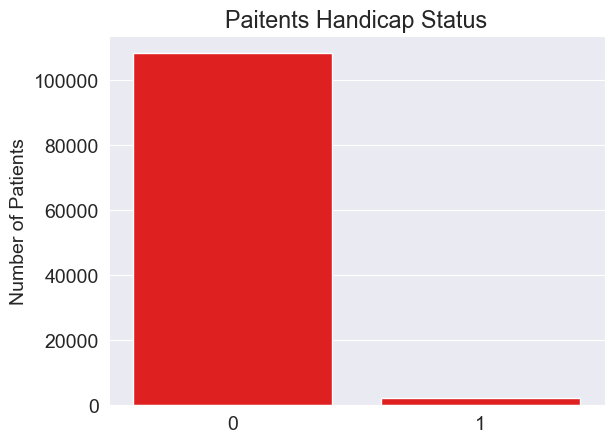

In [25]:
sns.countplot(data = df, x ='Handicap', color = "red")
label('Paitents Handicap Status',[0,1], '','Number of Patients')

Most of them don't have Handicap

Deep Look on Paitents SMS_received Status

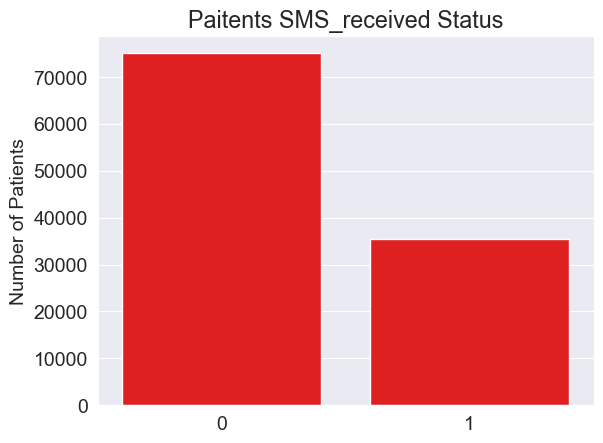

In [26]:
sns.countplot(data = df, x ='SMS_received', color = "red")
label('Paitents SMS_received Status',[0,1], '','Number of Patients')

Half did not receive the message

Age distrpution

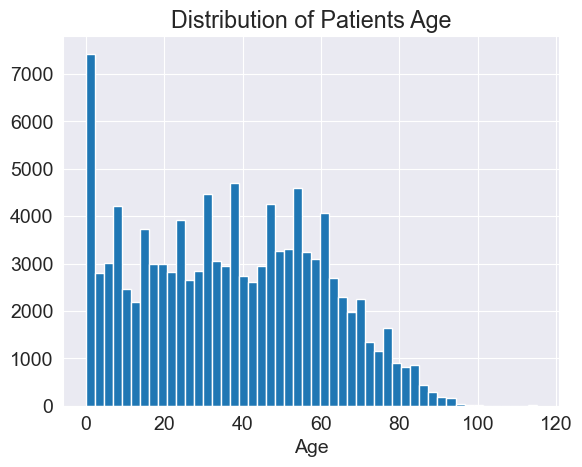

In [27]:
bin_edges = np.arange(0, df['Age'].max()+5, 10)
plt.hist(data = df, x = 'Age', bins = 50)
plt.xlabel('Age')
plt.title('Distribution of Patients Age');

most of the patients are young and middle age.

In [28]:
#Patients are divided into two groups according to attendance
show=df.No_show=='No'
noshow=df.No_show=='Yes'
df[show].count(),df[noshow].count()

(Gender           88207
 Age              88207
 Neighbourhood    88207
 Scholarship      88207
 Hypertension     88207
 Diabetes         88207
 Alcoholism       88207
 Handicap         88207
 SMS_received     88207
 No_show          88207
 BinNoShow        88207
 dtype: int64,
 Gender           22319
 Age              22319
 Neighbourhood    22319
 Scholarship      22319
 Hypertension     22319
 Diabetes         22319
 Alcoholism       22319
 Handicap         22319
 SMS_received     22319
 No_show          22319
 BinNoShow        22319
 dtype: int64)

## Q1.Does age effect attendence?

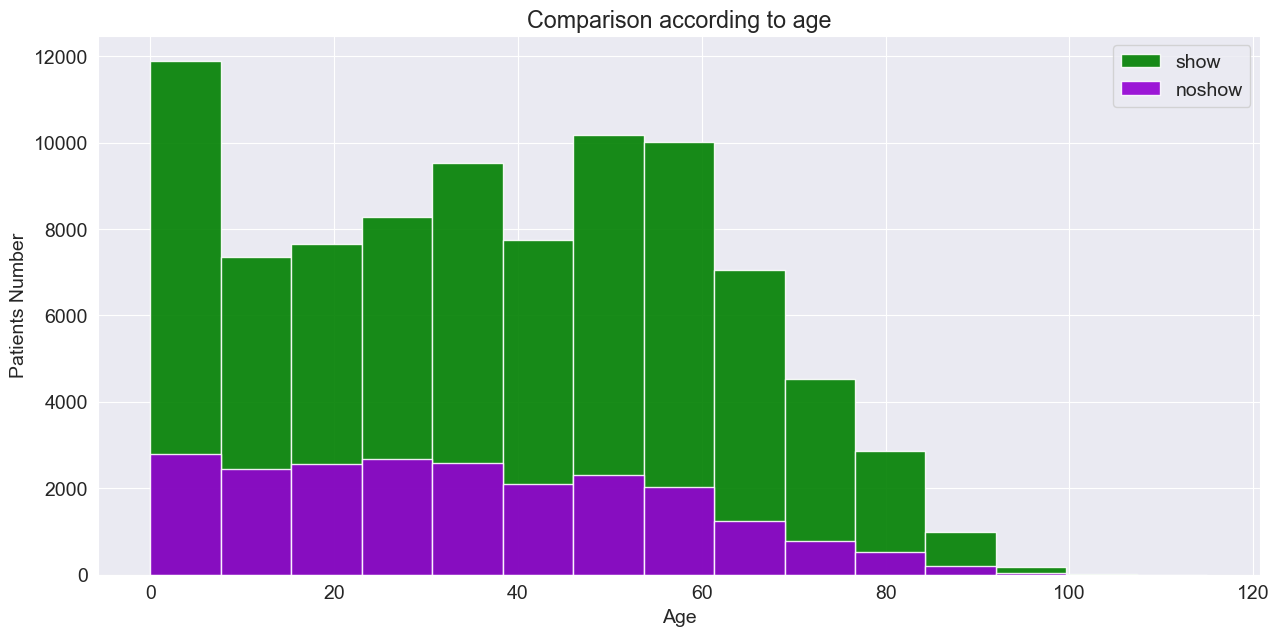

In [40]:
def attendance (df, col_name, attended, absent):

    plt.figure(figsize=[15,7])
    df[col_name][attended].plot(kind='hist',alpha=0.9,bins=15, color='green' , label='show') 
    df[col_name][absent].plot(kind='hist',alpha=0.9,bins=15, color='darkviolet' , label='noshow') 
    plt.legend();
    plt.title('Comparison according to age')
    plt.ylabel('Patients Number')
    plt.xlabel('Age');

attendance (df, 'Age', show, noshow)

### It is clear from the figure that most of the patients who show are from age of 0 to 8 and age 45 to 55 and from 60 and above the numbers keep falling

## Q2.does age and chronic diseases affect the attendence?


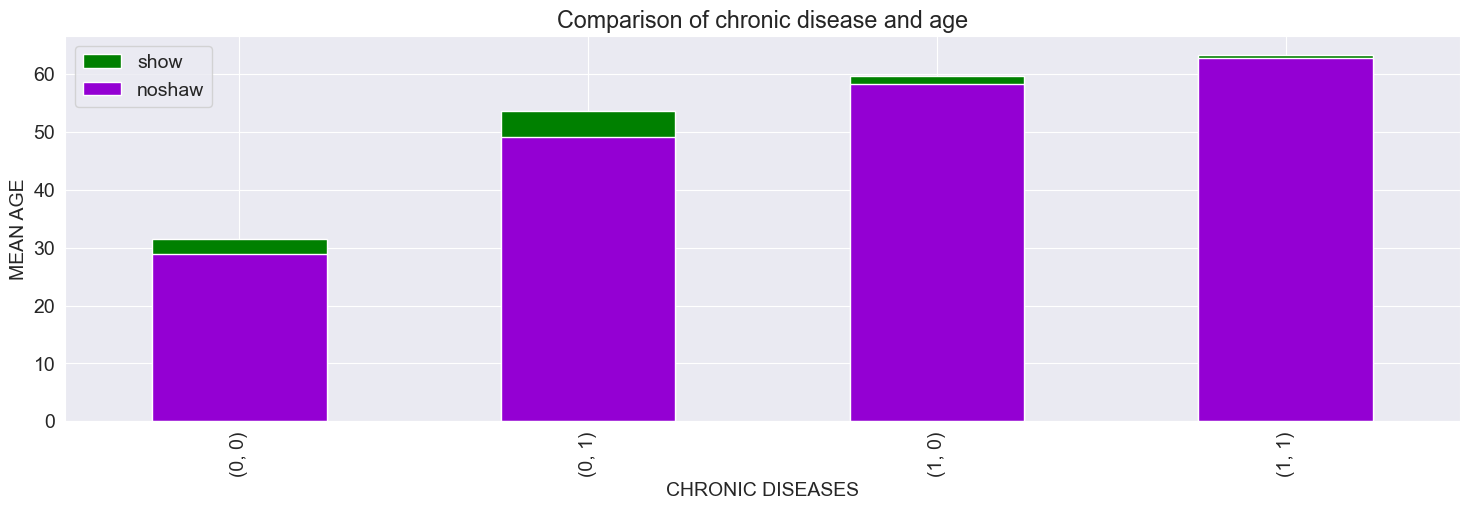

In [177]:
plt.figure(figsize=[18,5])
df[show].groupby(['Hypertension', 'Diabetes' ]).mean()['Age'].plot(kind='bar', color='green', label='show')
df[noshow].groupby(['Hypertension', 'Diabetes' ]).mean()['Age'].plot(kind='bar',color='darkviolet', label='noshaw')
plt.legend();                                                                   
plt.title('Comparison of chronic disease and age') 
plt.ylabel('MEAN AGE')
plt.xlabel('CHRONIC DISEASES');
                    

### There is a correltion between age and chronic diseases, and no correltion between chronic diseases and attending.

## Q3.Are SMS notifications associated with lowered incidences of No Shows?

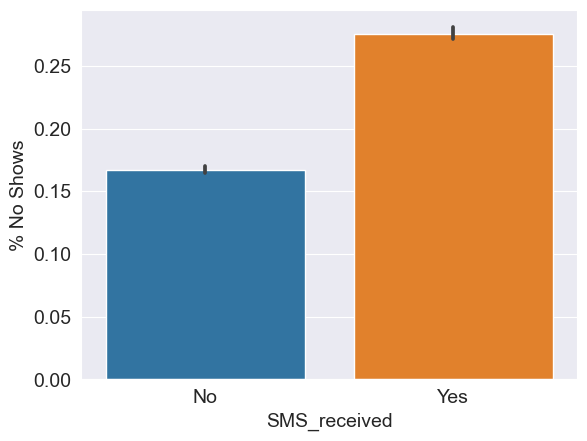

In [194]:
yes_or_no = {1:'Yes', 0:'No'}
# bar plot the percentage of noshows for each sms condition
ax = sns.barplot(x=df.SMS_received.map(yes_or_no), y=df.BinNoShow)
ax.set_ylabel('% No Shows');

### the percentage of no shows is much higher when SMS messages were received.

## Q4.does neighbourhood affect the attendance?


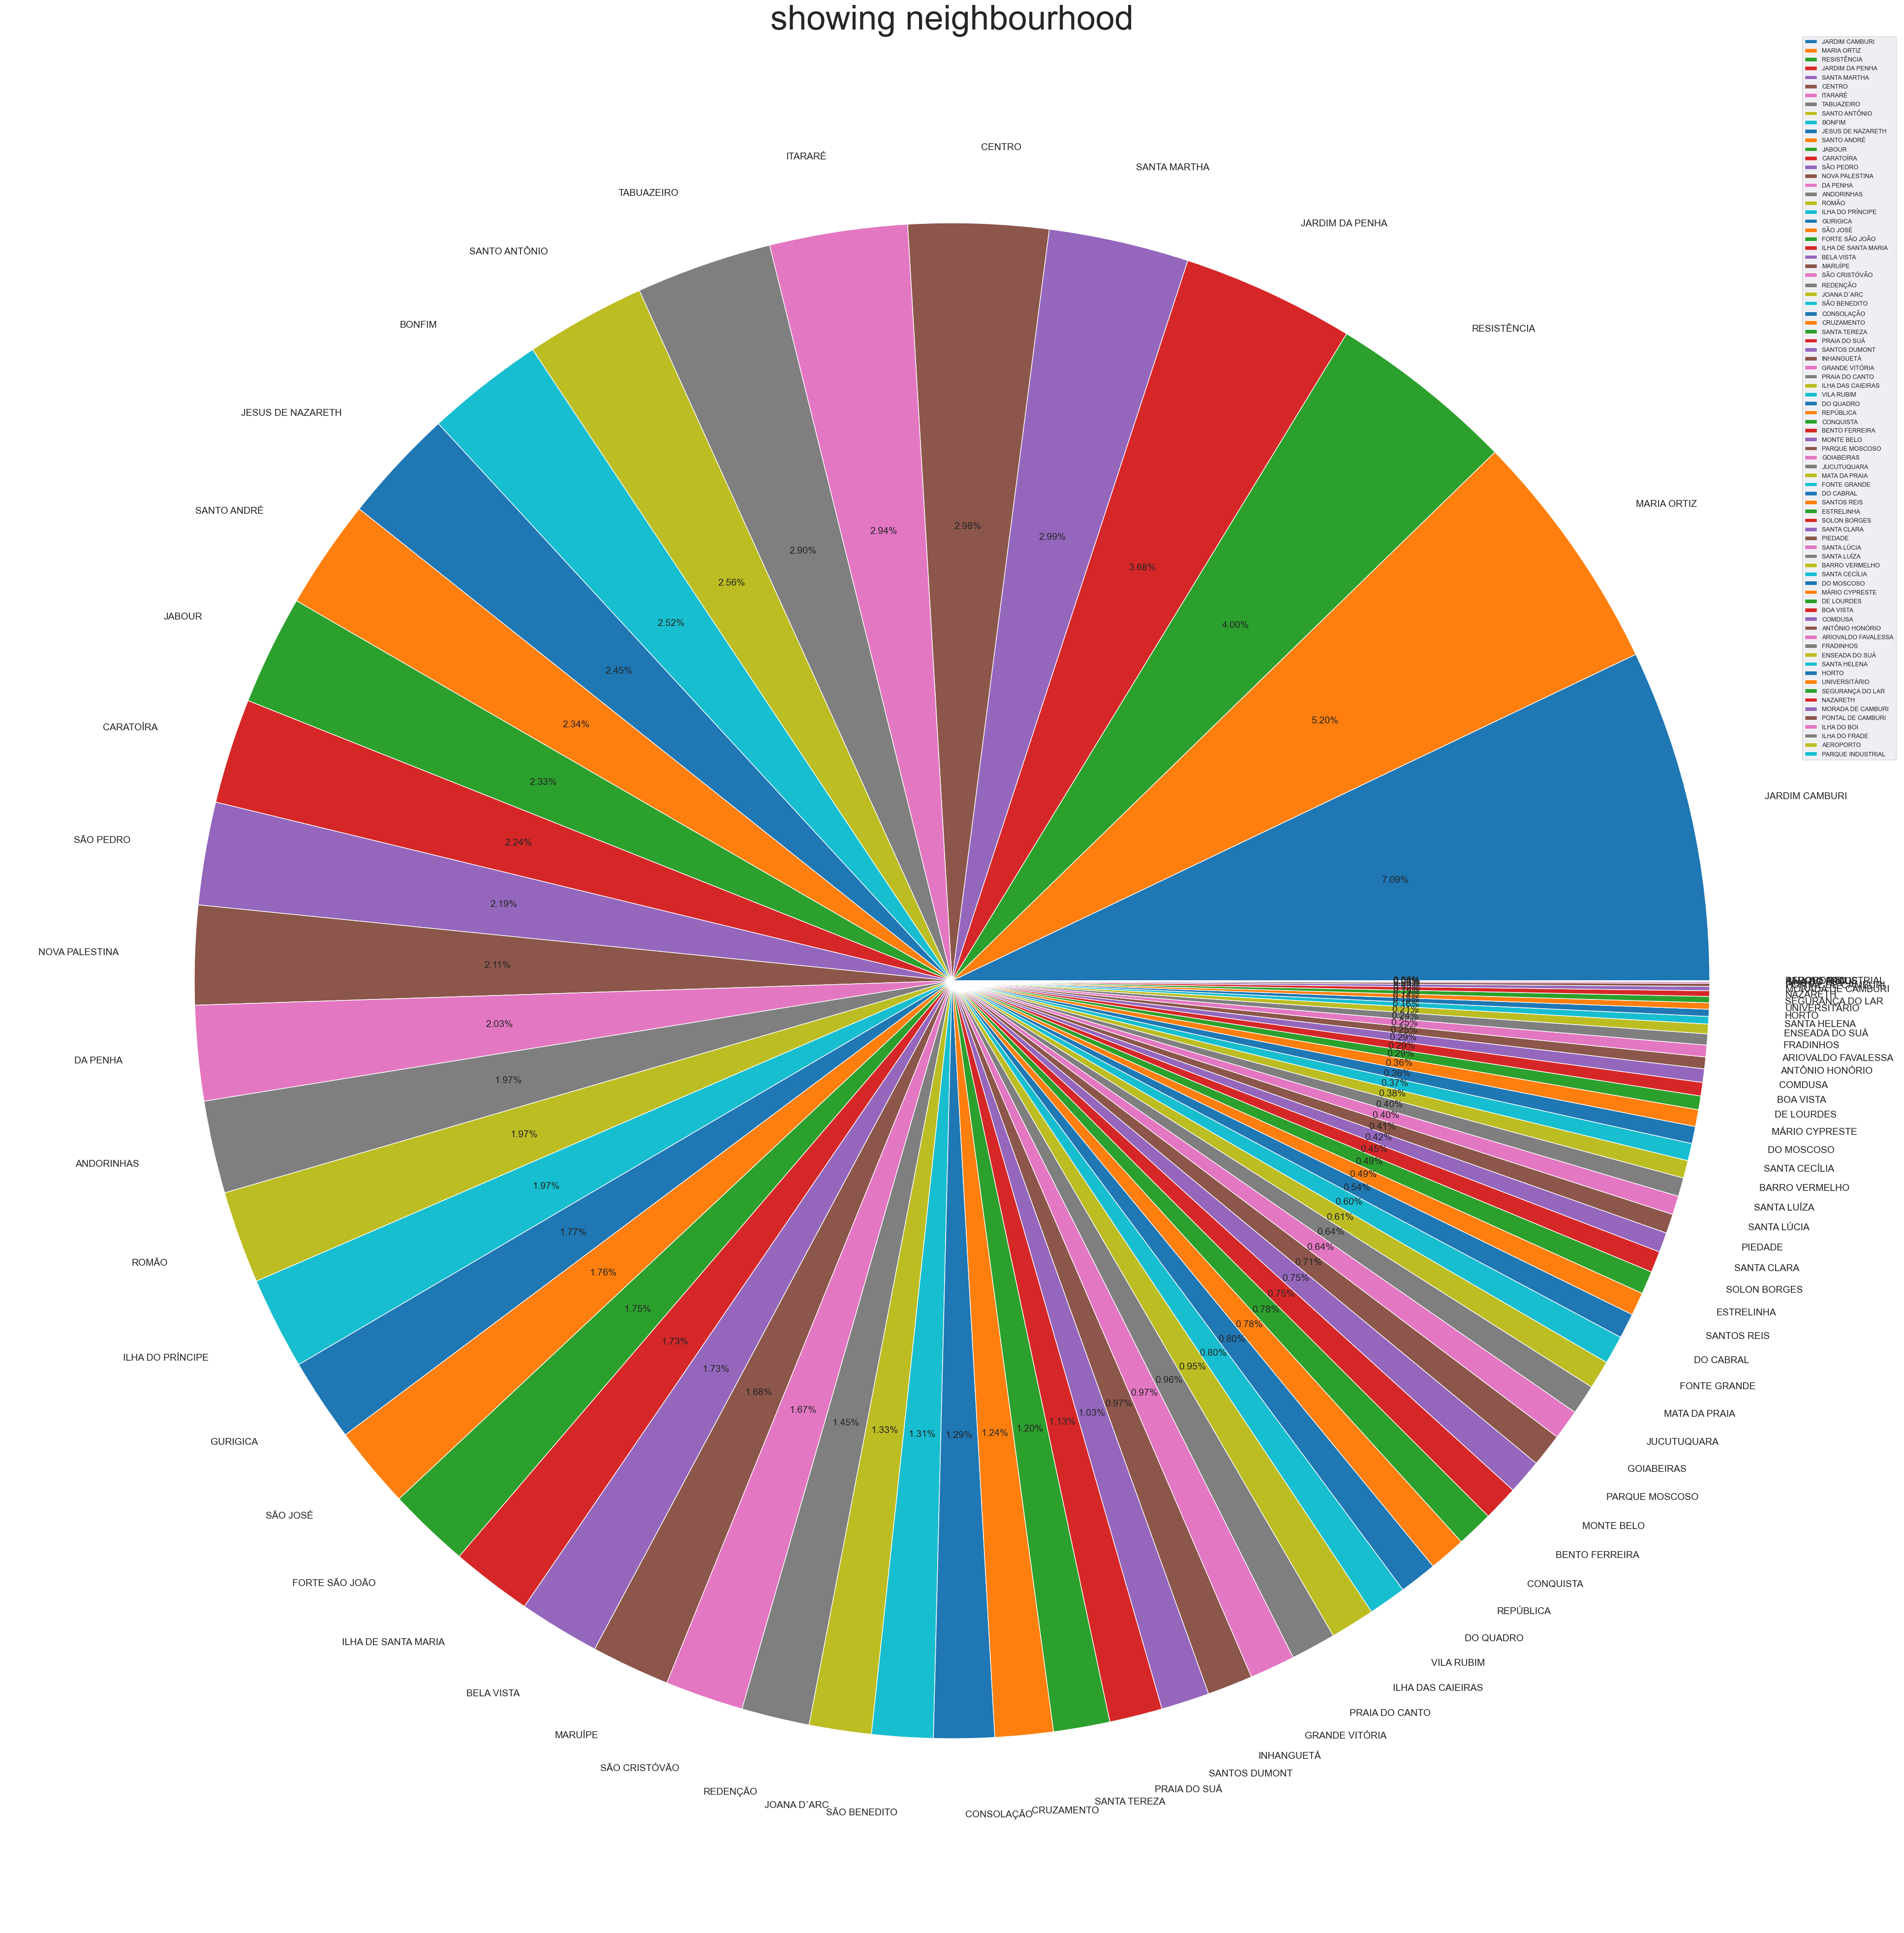

In [191]:
df.Neighbourhood[show].value_counts().plot(kind='pie', figsize=(100,50),autopct='%1.2f%%',label='show')
plt.ylabel('')
plt.legend(fontsize=9)
plt.title('showing neighbourhood',fontsize=50);

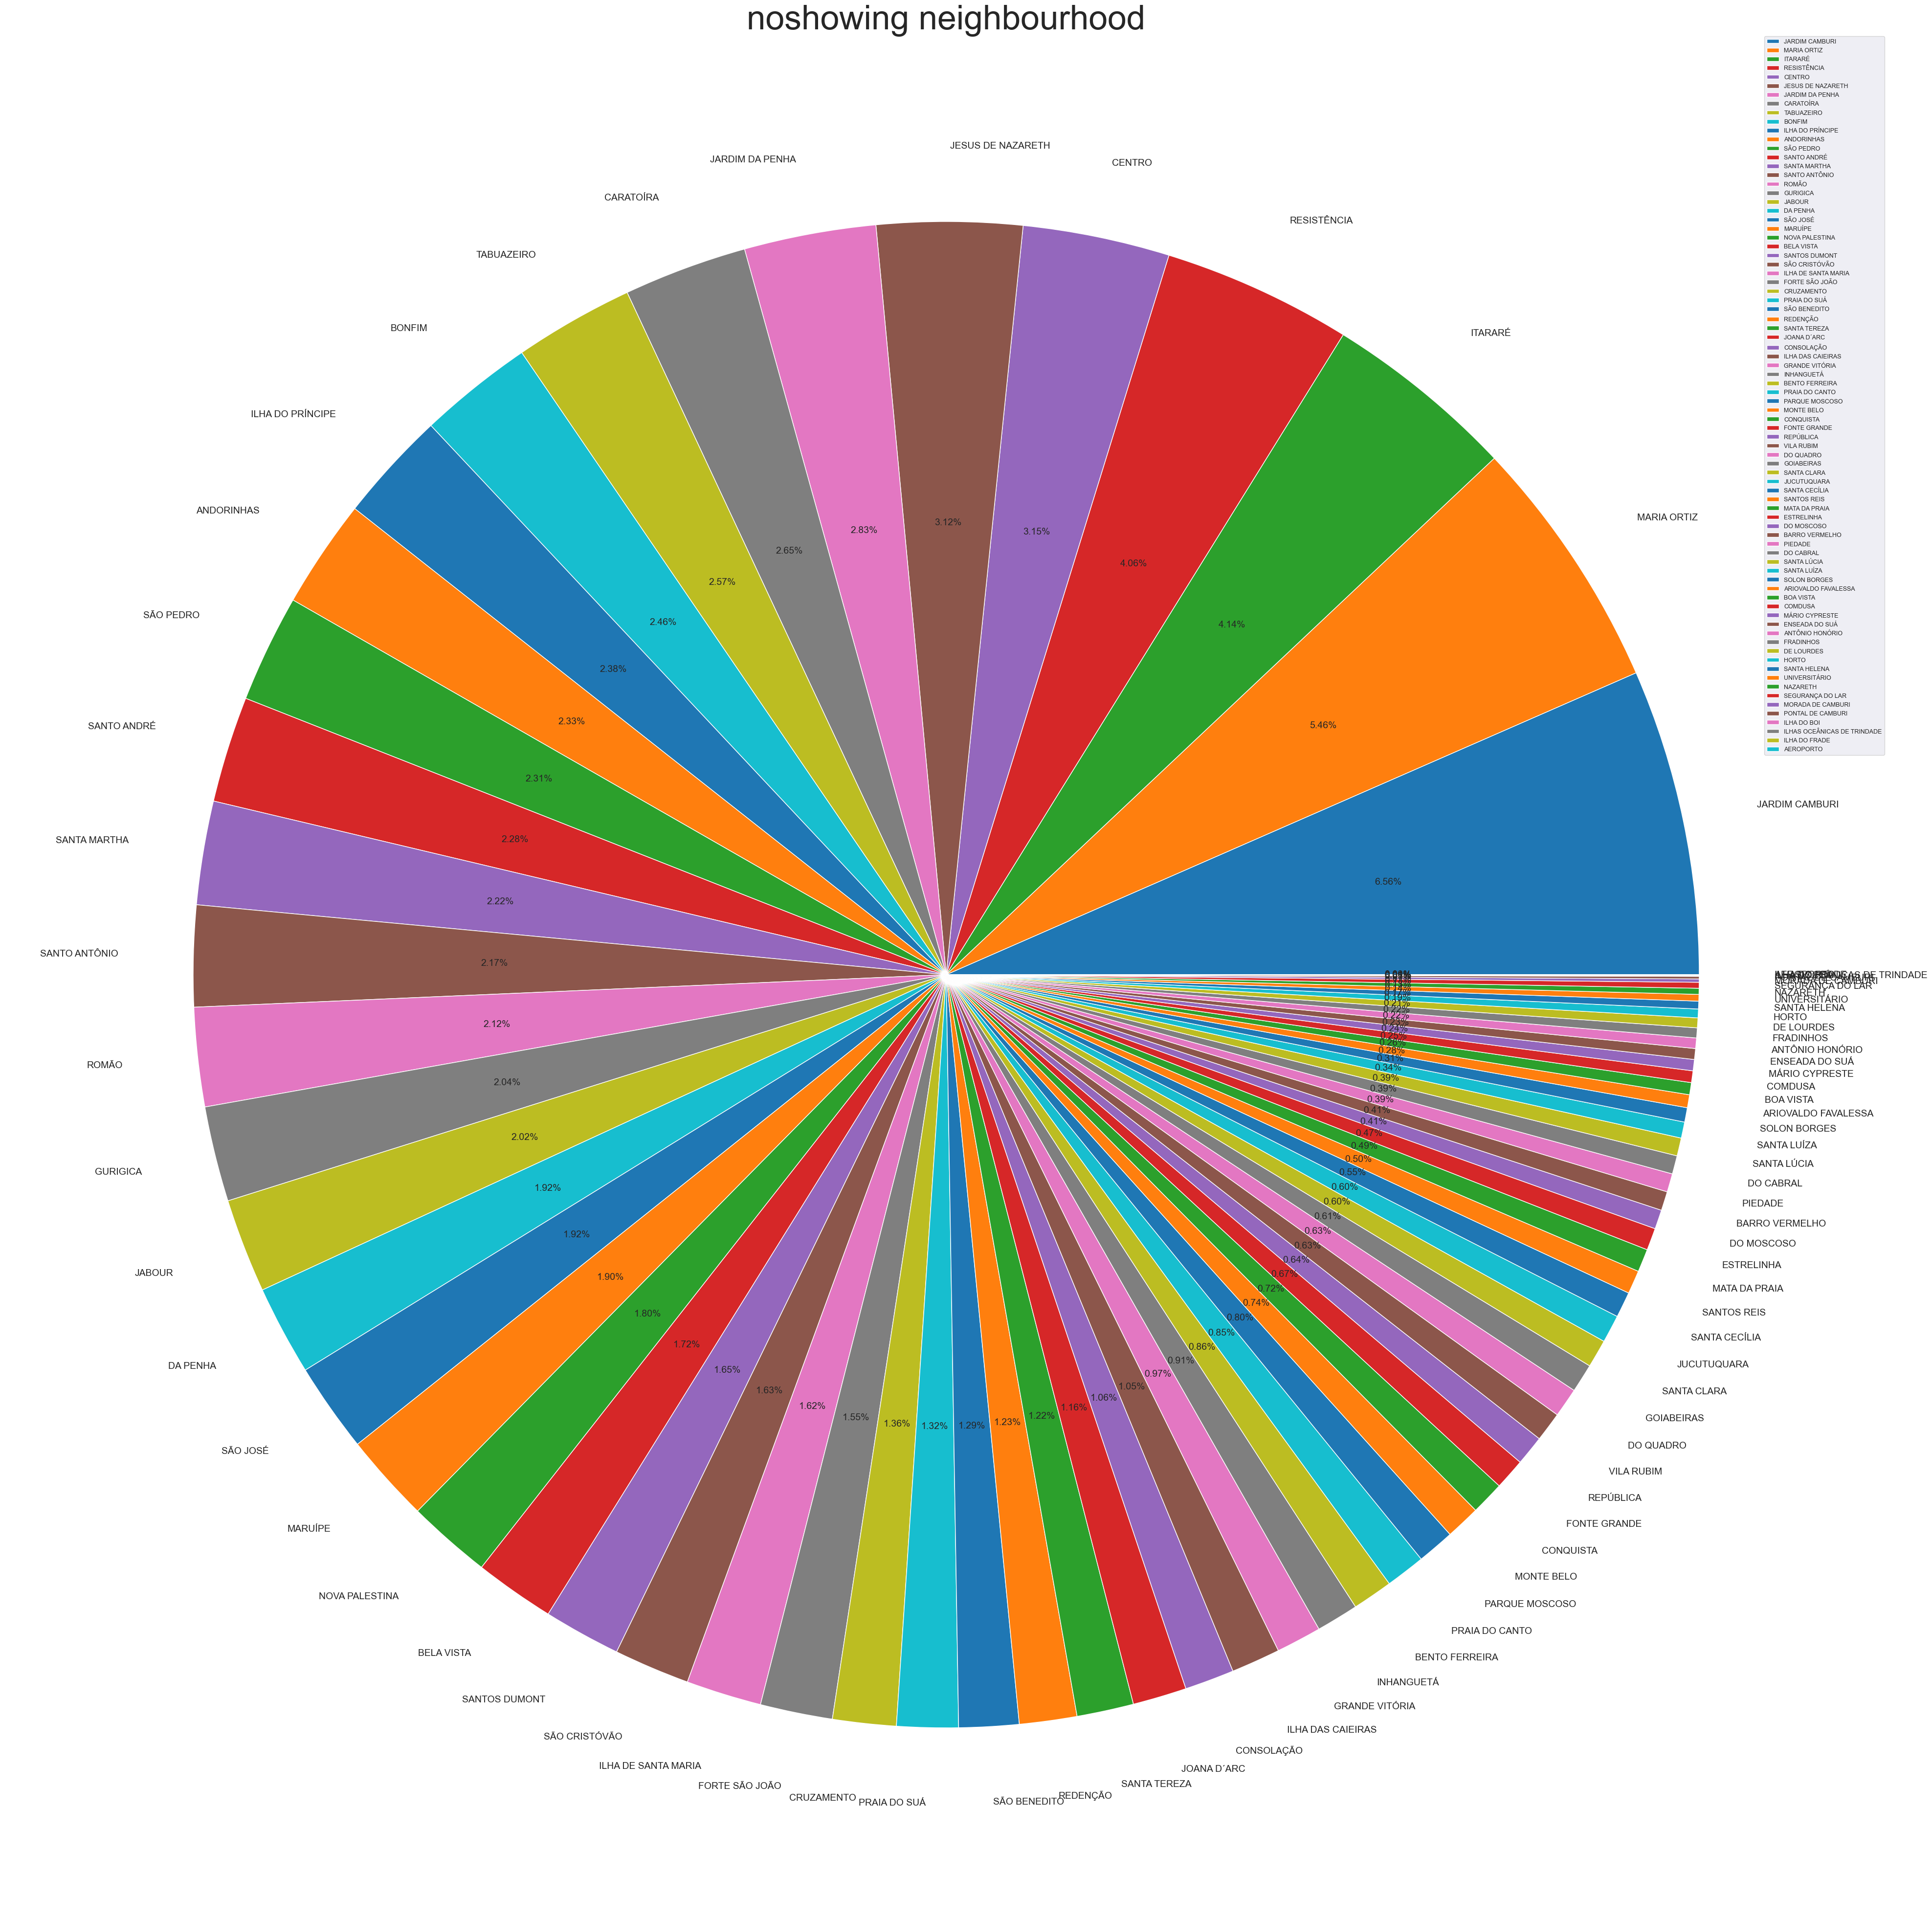

In [192]:
df.Neighbourhood[noshow].value_counts().plot(kind='pie', figsize=(100,50),autopct='%1.2f%%',label='noshow')
plt.ylabel('')
plt.legend(fontsize=9)
plt.title('noshowing neighbourhood',fontsize=50);

### seems that the most no-show neighborhoods are (JARDIM CARMBURI, MARIA ORTIZ, ITARARE). But at the same time they are the most showing, this is due to the fact that they are the most densely populated neighborhoods And so are the rest of the neighborhoods.

<a id='conclusions'></a>
## Conclusions

#### 1- Age has a clear influence on the 'showing rate Ages from 0:8 are the most showing then from 45:55 and from 60 and above the numbers keep falling.


#### 2-chronic diseases does not affect much on showing

#### 3-the relationship between SMS_received and No Shows was contrary to what was expected Number of showing patients without receiving sms is greater than showing patients with receiving sms, which means that we need to check our sms compaghin.

#### 4-Neighbourhooh has a great effect on attendence or not, JARDIM CAMBURI has the greatest number of patients and also has the greatest showing rate.


### Limitation:

#### 1-Appointment time wasn't given, which could be very useful.

#### 2-No clear correlation between chronic diseases and showing.

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295